In [1]:
import torch
import math

In [2]:
def get_data(n):
    """
    Returns train and test data x, y each having n points sampled uniformly in [0, 1]^2,
    each with a label 0 if outside the disk centered at (0.5, 0.5) of radius 1/√2π, and 1 if inside.
    :param n: Number of data points
    :return: data, labels
    """
    x = torch.empty(n, 2)
    x = x.uniform_(0, 1)

    x_centered = x - 0.5
    norm_squared = x_centered.pow(2).sum(dim=1)

    radius = 1 / (2 * math.pi)

    # To check if the points are inside the disk
    y = norm_squared.sub(radius).sign().add(1).div(2)
    return x, y

In [5]:
import matplotlib.pyplot as plt

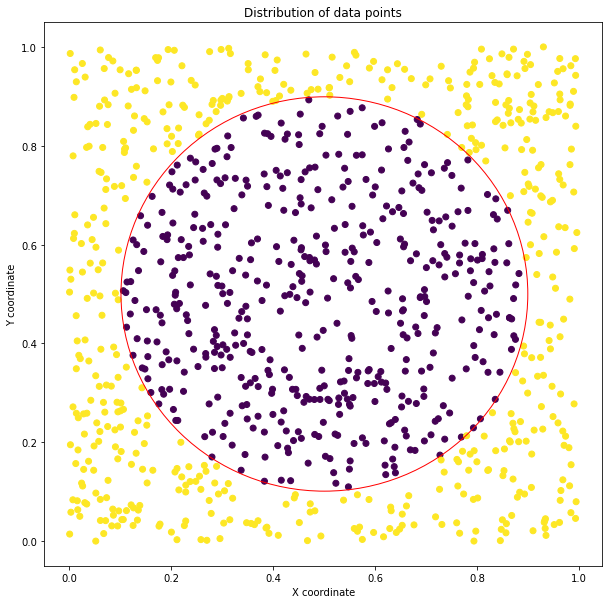

In [18]:
data, labels = get_data(1000)
#Plot the distribution of the generated data, to see how it looks like
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.scatter(data[:,0].tolist(), data[:,1].tolist(), c = labels.tolist())
ax.add_patch(plt.Circle((0.5, 0.5), 1 / (math.sqrt(2*math.pi)), color='r', fill=False))
plt.savefig('disk_data.png')
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Distribution of data points")
plt.show()